In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('./Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [11]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

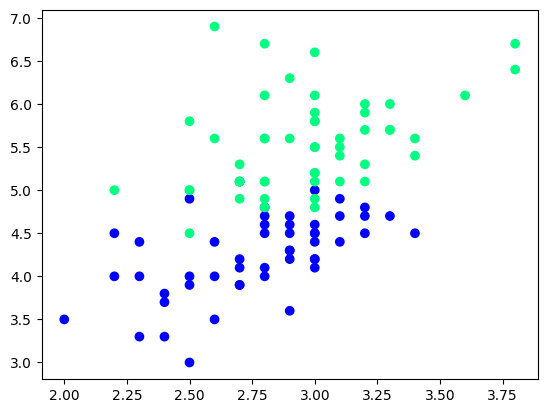

In [13]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [14]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
95,3.0,4.2,1
50,3.2,4.7,1
91,3.0,4.6,1
105,3.0,6.6,2
60,2.0,3.5,1
67,2.7,4.1,1
82,2.7,3.9,1
66,3.0,4.5,1
104,3.0,5.8,2
102,3.0,5.9,2


In [15]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [16]:
df_train

,SepalWidthCm,PetalLengthCm,Species
77,3.0,5.0,1
67,2.7,4.1,1
80,2.4,3.8,1
128,2.8,5.6,2
97,2.9,4.3,1
99,2.8,4.1,1
113,2.5,5.0,2
52,3.1,4.9,1
68,2.2,4.5,1
102,3.0,5.9,2


In [17]:
df_val

,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
79,2.6,3.5,1
115,3.2,5.3,2
50,3.2,4.7,1
98,2.5,3.0,1


In [18]:
df_test

,SepalWidthCm,PetalLengthCm,Species
69,2.5,3.9,1
53,2.3,4.0,1
122,2.8,6.7,2
87,2.3,4.4,1
147,3.0,5.2,2


In [19]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [20]:
y_test

array([2, 1, 2, 1, 1])

# Case 1 - Bagging

In [21]:
# Data for Tree 1
# replace=True means we can sample the same row more than once
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
68,2.2,4.5,1
97,2.9,4.3,1
97,2.9,4.3,1
99,2.8,4.1,1
128,2.8,5.6,2
128,2.8,5.6,2
128,2.8,5.6,2
68,2.2,4.5,1


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [26]:
dt_bag1 = DecisionTreeClassifier()

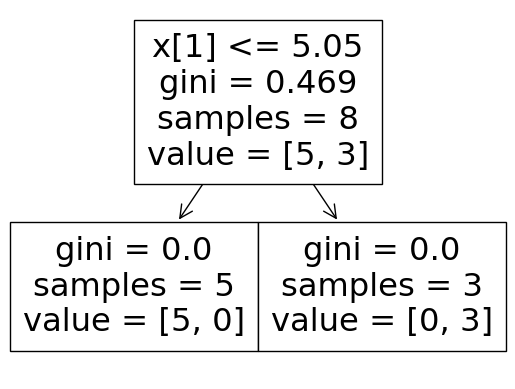

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


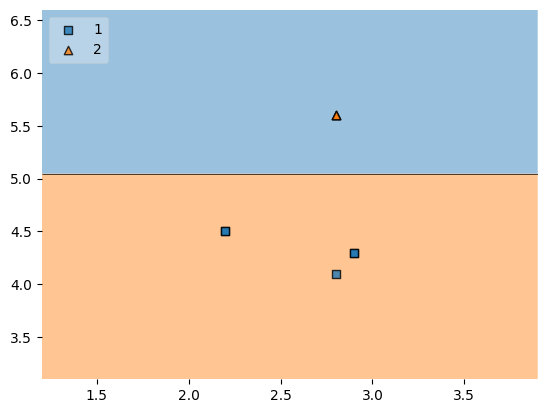

In [27]:
evaluate(dt_bag1,X,y)

In [28]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
77,3.0,5.0,1
97,2.9,4.3,1
67,2.7,4.1,1
128,2.8,5.6,2
97,2.9,4.3,1
128,2.8,5.6,2
102,3.0,5.9,2


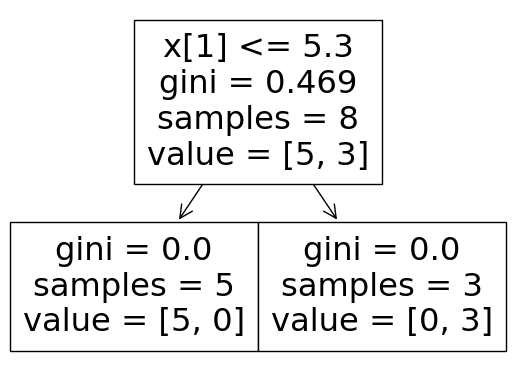

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


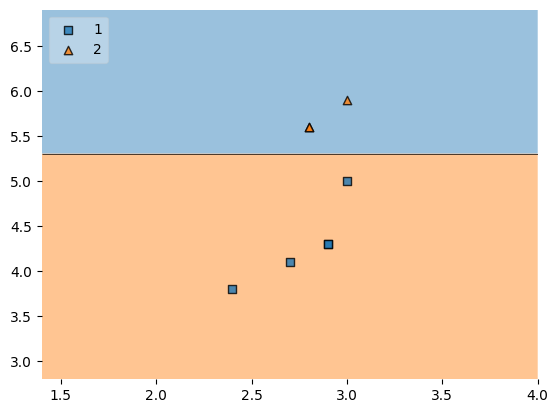

In [29]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [30]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
97,2.9,4.3,1
80,2.4,3.8,1
99,2.8,4.1,1
113,2.5,5.0,2
68,2.2,4.5,1
77,3.0,5.0,1
99,2.8,4.1,1
80,2.4,3.8,1


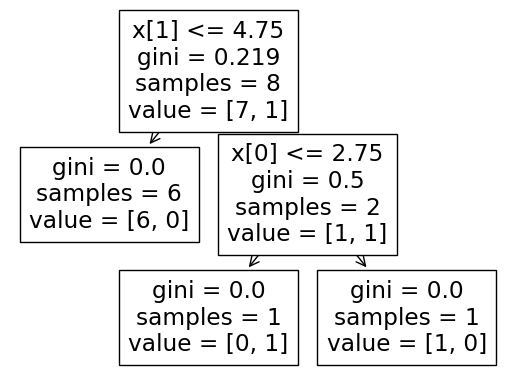

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


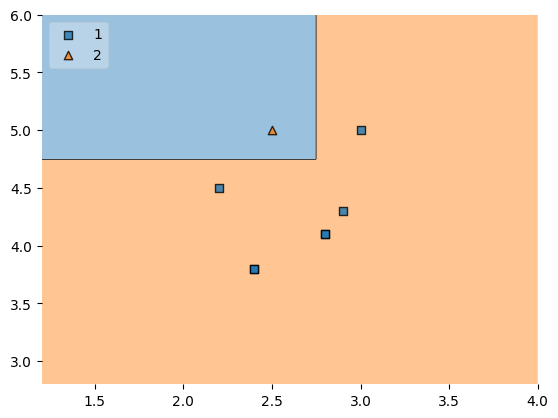

In [31]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [32]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [33]:
df_test

,SepalWidthCm,PetalLengthCm,Species
69,2.5,3.9,1
53,2.3,4.0,1
122,2.8,6.7,2
87,2.3,4.4,1
147,3.0,5.2,2


In [34]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [35]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
77,3.0,5.0,1
67,2.7,4.1,1
80,2.4,3.8,1
128,2.8,5.6,2
97,2.9,4.3,1
99,2.8,4.1,1
113,2.5,5.0,2
52,3.1,4.9,1
68,2.2,4.5,1
102,3.0,5.9,2


In [36]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
113,2.5,5.0,2
52,3.1,4.9,1
102,3.0,5.9,2
77,3.0,5.0,1
68,2.2,4.5,1
80,2.4,3.8,1
128,2.8,5.6,2
99,2.8,4.1,1


# Random Subspaces

In [38]:
df1 = pd.read_csv('./Iris.csv')
df1 = df1.sample(10)

In [39]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
44,45,5.1,3.8,1.9,0.4,Iris-setosa
43,44,5.0,3.5,1.6,0.6,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
34,35,4.9,3.1,1.5,0.1,Iris-setosa


In [40]:
df1.sample(2,replace=True,axis=1)

,Id,PetalLengthCm
44,45,1.9
43,44,1.6
37,38,1.5
59,60,3.9
93,94,3.3
0,1,1.4
128,129,5.6
127,128,4.9
72,73,4.9
34,35,1.5


# Random Patches

In [41]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
44,45,5.1,3.8,1.9,0.4,Iris-setosa
43,44,5.0,3.5,1.6,0.6,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
34,35,4.9,3.1,1.5,0.1,Iris-setosa


In [42]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,Id
34,4.9,35
0,5.1,1
43,5.0,44
37,4.9,38
37,4.9,38
93,5.0,94
93,5.0,94
34,4.9,35
